**神经网络（Neural Network）** 指的是一种特定类型的假设函数，它由 **多个参数化的、可微分的函数（也称为“层”）组合而成，用于形成输出**。

这个术语源自生物学的启发，但实际上只要符合上述类型的任何假设函数，都可以被称为神经网络，和生物学关联不大

神经网络是深度学习的核心。它们用途广泛、功能强大且可扩展，使其非常适合处理大型和高度复杂的机器学习任务，例如对数十亿个图像进行分类（例如Google Images），为语音识别服务提供支持，每天向成千上万的用户推荐（例如抖音）观看的最佳视频，或学习在围棋游戏（DeepMind的AlphaGo）中击败世界冠军。

学习顺序：浏览下最简单的神经网络，然后到多层感知机，之后通过Tensorflow的Keras API实现神经网络

## 神经网络的发展过程

1. 人工神经网络已经存在很长一段时间了：它们于1943首次提出，该模型计算了生物神经元如何在动物大脑中协同工作，利用命题逻辑进行复杂的计算。这是第一个人工神经网络架构。从那时起，许多其他架构被发明出来。

2. 人工神经网络的早期成功导致人们普遍相信，我们很快将与真正的智能机器进行对话。当在20世纪60年代人们清楚地知道不能兑现这一承诺（至少相当长一段时间）时，资金流向了其他地方，人工神经网络进入了漫长的冬天。

3. 在20世纪80年代初期，发明了新的架构，并开发了更好的训练技术，从而激发了人们对连接主义（神经网络的研究）的兴趣。但是进展缓慢。

4. 到了20世纪90年代，发明了其他强大的机器学习技术，例如支持向量机。这些技术提供了似乎比人工神经网络更好的结果和更坚实的理论基础，神经网络的研究再次被搁置。

5. 现在目睹了对人工神经网络的另一波兴趣。这波浪潮会像以前一样消灭吗？这里有一些充分的理由使我们相信这次是不同的，人们对人工神经网络重新充满兴趣将对我们的生活产生更深远的影响：
    - 现在有大量数据可用于训练神经网络，并且在非常大和复杂的问题上，人工神经网络通常优于其他机器学习技术。
    - 自20世纪90年代以来，计算能力的飞速增长使得现在有可能在合理的时间内训练大型神经网络。这部分是由于摩尔定律（集成电路中的器件数量在过去的50年中，每两年大约增加一倍）这还要归功于游戏产业——刺激了数百万计强大的GPU卡的生产。此外，云平台已使所有人都可以使用这个功能。
    - 训练算法已得到改进。它们与20世纪90年代使用的略有不同，但是这些相对较小的调整产生了巨大的积极影响。
    - 在实践中，人工神经网络的一些理论局限性被证明是良性的。例如，许多人认为ANN训练算法注定要失败，因为它们可能会陷入局部最优解，但事实证明这在实践中并不是一个大问题，尤其是对于较大的神经网络：局部最优解通常表现得几乎与全局最优解一样好。
    - 人工神经网络似乎已经进入了资金和发展的良性循环。基于人工神经网络的好产品会成为头条新闻，这吸引了越来越多的关注和资金，从而带来了越来越多的进步甚至产生了惊人的产品。

## 感知机

感知机是最简单的神经网络架构，于 1957 年发明。它称为阈值逻辑单元（Threshold Logic Unit，TLU），有时也称为线性阈值单元（Linear Threshold Unit，LTU）。输入和输出是数字（而不是二进制开/关值），并且每个输入连接都与权重相关联。TLU 首先计算其输入的线性函数：

$$z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b = \mathbf{w}^T \mathbf{x} + b.$$

然后它对结果应用阶跃函数：

$$h_w(x) = \text{step}(z).$$

所以它几乎与逻辑回归一样，只是它使用阶跃函数而不是sigmoid函数。就像在逻辑回归中一样，模型参数是输入权重 $\mathbf{w}$ 和偏置项 $b$。

![TLU单元](./images/neural_network/p1.png)

感知机中最常用的阶跃函数是 Heaviside 阶跃函数。有时使用符号函数代替。

**公式：感知机中使用的常见阶跃函数（假设阈值 = 0）**

$$
\text{heaviside}(z) =
\begin{cases}
0, & z < 0 \\
1, & z \ge 0
\end{cases}
\qquad
\text{sgn}(z) =
\begin{cases}
-1, & z < 0 \\
0, & z = 0 \\
+1, & z > 0
\end{cases}
$$

单个 TLU 可用于简单的线性二元分类。它计算其输入的线性函数，如果该结果大于阈值，则输出正类；否则，它输出负类。

有点像逻辑回归 或线性 SVM 分类。例如，可以使用单个 TLU 根据花瓣长度和宽度对鸢尾花进行分类。训练这样的 TLU 需要求出 $w_1、w_2$ 和 $b$ 的正确值（训练算法将在稍后讨论）。


 感知机由一个或多个组织在单层中的TLU组成，其中每个TLU都连接到每个输入。这样的层称为全连接层，或密集层。这些输入构成输入层。由于TLU层产生最终输出，因此称为输出层。例如，具有两个输入和三个输出的感知机如下图所示：

![两个输入神经元和三个输出神经元的感知机](./images/neural_network/p2.png)

这个感知机可以同时将实例分类为三个不同的二元类，这使它成为一个多标签分类器。它也可以用于多类分类。

借助线性代数，下面公式 可用于同时针对多个实例有效地计算一层人工神经元的输出。

**公式：计算全连接层的输出**

$$
h_{\mathbf{w}, b}(\mathbf{X}) = \phi(\mathbf{XW} + \mathbf{b})
$$

其中：
- $\mathbf{X}$ 代表输入特征的矩阵。每个实例一行，每个特征一列。
- 权重矩阵 $\mathbf{W}$ 包含所有连接权重。每个输入一行，每个神经元一列。

- 偏置向量 $\mathbf{b}$ 包含所有偏置项：每个神经元一个。

- 函数 $\phi$ 称为激活函数：当神经元是 TLU 时，它是阶跃函数（后面会讨论其他激活函数）。



## 感知机的训练

感知机一次被送入一个训练实例，并且针对每个实例进行预测。对于产生错误预测的每个输出神经元，它会增强来自输入的连接权重，这些权重有助于正确的预测。这个规则公式如下：

**公式：感知机学习规则（权重更新）**

$$
w_{i,j}^{\text{下一步}} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
$$

其中：
- $w_{i,j}$ 是第 $i$ 个输入和第 $j$ 个神经元之间的连接权重。
- $x_i$ 是当前训练实例的第 $i$ 个输入值。
- $\hat{y}_j$ 是当前训练实例的第 $j$ 个输出神经元的输出。
- $y_j$ 是当前训练实例的第 $j$ 个输出神经元的目标输出。
- $\eta$ 是学习率

每个输出神经元的决策边界都是线性的，因此感知机无法学习复杂的模式（和逻辑回归很像）；但如果训练实例是线性可分离的，这个算法会收敛到一个解

In [16]:
# Scikit-Learn的 Perceptron类
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

print(per_clf.coef_, per_clf.intercept_)
X_new = [[2,0.5],[3,1]]
y_pred = per_clf.predict(X_new)
y_pred

[[-1.4 -2.2]] [4.]


array([ True, False])

In [17]:
# 练习： 自己实现一下（numpy) 感知机的训练，就用上面代码的数据集
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)


# 训练过程
np.random.seed(42)
w = np.random.rand(2)
b = np.random.rand()
eta = 0.1
epoches = 20


for _ in range(epoches):
    for i in range(X.shape[0]):
        y_real = y[i]
        y_pred = 1 if np.dot(w, X[i]) + b >= 0 else 0

        w = w + eta * (y_real - y_pred) * X[i]
        b   = b + eta*(y_real - y_pred)

In [19]:
print(w, b)
X_new = [[2,0.5],
         [3,1]]

print(X_new @ w + b  >= 0)

from sklearn.metrics import accuracy_score
accuracy_score(X@w + b >=0, y)

[-0.50545988  0.50071431] 0.931993941811405
[ True False]


1.0

感知机有严重缺陷，特别是它们无法解决一些微不足道的问题［例如，异或(XOR)分类问题］。任何其他线性分类模型（例如逻辑回归分类器）都是如此

![XOR分类问题](./images/neural_network/p3.png)

可以通过堆叠多个感知机来消除感知机的局限性，得出来的神经网络叫多层感知机。 MLP(Multi Layer Perceptron)可以解决异或问题：可以把值(0,0),(0,1),(1,0),(1,1)代入下图验证：

![XOR的MLP](./images/neural_network/p4.png)

In [20]:
# 随堂练习：使用Numpy模拟这个感知机，并测试4个输入：(0,0),(0,1),(1,0),(1,1)
import numpy as np

def step(z):  # 阶跃函数
    # 实现阶跃函数
    return np.where(z >=0, 1, 0)


def mlp_xor(X):
    # 按图片给定的权重，实现两层感知机

    # 第一层
    W1 = np.ones((2,2))
    b1 = np.array([[-1.5, -0.5]])
    z1 = step(X@W1 + b1)  # shape: (m,2)

    # 第二层
    W2 = np.array([-1,1]).reshape(2,1)
    b2= -0.5
    z2 = step(z1 @W2 + b2)

    return z2



# 测试 4 个输入
X = np.array([[0,0],[1,0],[0,1],[1,1]])
print("X:\n", X)
print("XOR:\n", mlp_xor(X))  # 期望 [0,1,1,0]

X:
 [[0 0]
 [1 0]
 [0 1]
 [1 1]]
XOR:
 [[0]
 [1]
 [1]
 [0]]


## 多层感知机和反向传播

MLP由一层输入层、一层或多层TLU（称为隐藏层）和一个TLU的最后一层（称为输出层）组成。靠近输入层的层通常称为较低层，靠近输出层的层通常称为较高层。

![2个输入，1个4个神经元的隐藏层和3个输出神经元的MLP](./images/neural_network/p5.png)

输入到输出仅沿一个方向流动，因此该架构是前馈神经网络（Feedforward Neural Network, FNN）的一个示例

当一个神经网络包含一个深层的隐藏层时，它称为深度神经网络(Deep Neural Network，DNN)。深度学习领域研究DNN，

更广泛地说，它对包含深度计算堆栈的模型感兴趣。即便如此，只要涉及神经网络（甚至是浅层的神经网络），许多人就会谈论深度学习。

- 通用函数逼近 (Universal Function Approximation)

**定理（1维情况）**：
给定任意光滑函数
$$f: \mathbb{R} \to \mathbb{R},$$
闭区间
$$\mathcal{D} \subset \mathbb{R},$$
以及一个 $\epsilon > 0$，

我们可以构造一个单隐层神经网络 $\hat{f}$，使得：
$$
\max_{x \in \mathcal{D}} \, | f(x) - \hat{f}(x) | \le \epsilon
$$

通用逼近定理说明：只要网络有足够的隐藏单元，一个单隐层神经网络就能在任意精度上逼近任何连续函数。

训练MLP的方法是梯度下降：计算模型误差（损失函数）相对于模型参数的梯度。

具有多层的MLP如何计算梯度？

### 多层感知机（MLP）的梯度计算方法

在训练多层感知机（MLP）时，目标是最小化损失函数

$$
L(\hat{y}, y)
$$

并求解各层参数（权重和偏置）的梯度，以便进行梯度下降更新。

1. 数值微分（数值模拟方式）

最直观的方法是使用**数值微分**：
对每个参数 \$w\$，我们用有限差分近似：

$$
\frac{\partial f}{\partial w} \approx \frac{f(w + \epsilon) - f(w)}{\epsilon}
$$


优点：思路直观，易于理解。

缺点：

* **计算开销极大**：若网络有成千上万个参数，就需要成千上万次函数计算。
* **不准确**：有限差分会引入截断误差和舍入误差。
* **不可扩展**：在深度神经网络中完全不现实。

可以作为教学演示/梯度检查，但不能作为实际训练方法。

---

2. 符号法（手动推公式）

另一种方式是**符号推导**：

* 对网络的计算公式逐层写出，
* 然后直接按链式法则（chain rule）手工推导每个参数的偏导数。

优点：

* 能得到**精确的解析梯度**，没有数值误差。
* 数学上严谨。

缺点：

* **枯燥繁琐**：网络层数一多，公式就会爆炸式增长。
* **容易出错**：人工推导常常漏项或符号错误。
* **难以通用**：每换一个网络结构，都要重新手工推导一遍，无法转化成通用程序。


考虑一个最小的两层网络：
输入 $\mathbf{x} \in \mathbb{R}^2$，隐藏层 2 个神经元，输出层 1 个神经元。

**模型公式：**

**隐藏层：**
$$
z^{(1)} = W^{(1)} \mathbf{x} + b^{(1)}, \quad a^{(1)} = \sigma(z^{(1)})
$$

**输出层：**
$$
z^{(2)} = W^{(2)} a^{(1)} + b^{(2)}, \quad \hat{y} = \sigma(z^{(2)})
$$

其中 $\sigma$ 为 Sigmoid 激活函数：
$$
\sigma(u) = \frac{1}{1+e^{-u}}
$$



采用平方误差：
$$
L = \frac{1}{2} (y - \hat{y})^2
$$



我们想要求 $\frac{\partial L}{\partial W^{(2)}}$ 和 $\frac{\partial L}{\partial W^{(1)}}$。



对输出层权重 $W^{(2)}$：
$$
\frac{\partial L}{\partial W^{(2)}}
= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z^{(2)}} \cdot \frac{\partial z^{(2)}}{\partial W^{(2)}}
$$

分别计算：

- $\frac{\partial L}{\partial \hat{y}} = -(y - \hat{y})$
- $\frac{\partial \hat{y}}{\partial z^{(2)}} = \hat{y}(1-\hat{y})$
- $\frac{\partial z^{(2)}}{\partial W^{(2)}} = a^{(1)}$

所以：
$$
\frac{\partial L}{\partial W^{(2)}} = -(y - \hat{y}) \cdot \hat{y}(1-\hat{y}) \cdot a^{(1)}
$$



对输入层权重 $W^{(1)}$：
$$
\frac{\partial L}{\partial W^{(1)}}
= \frac{\partial L}{\partial \hat{y}} \cdot
\frac{\partial \hat{y}}{\partial z^{(2)}} \cdot
\frac{\partial z^{(2)}}{\partial a^{(1)}} \cdot
\frac{\partial a^{(1)}}{\partial z^{(1)}} \cdot
\frac{\partial z^{(1)}}{\partial W^{(1)}}
$$

分别计算：

- $\frac{\partial L}{\partial \hat{y}} = -(y - \hat{y})$
- $\frac{\partial \hat{y}}{\partial z^{(2)}} = \hat{y}(1-\hat{y})$
- $\frac{\partial z^{(2)}}{\partial a^{(1)}} = W^{(2)}$
- $\frac{\partial a^{(1)}}{\partial z^{(1)}} = a^{(1)}(1-a^{(1)})$ （逐元素）
- $\frac{\partial z^{(1)}}{\partial W^{(1)}} = \mathbf{x}$

合并：
$$
\frac{\partial L}{\partial W^{(1)}}
= \Big( -(y - \hat{y}) \cdot \hat{y}(1-\hat{y}) \cdot W^{(2)} \Big)
\odot \big(a^{(1)}(1-a^{(1)})\big) \cdot \mathbf{x}^T
$$



**结论与评价：**

- 一层还能手写。
- 层数一多，链式法则展开就非常冗长。
- 推导过程容易漏项、符号出错。

这就是符号法的 **枯燥与不易编程** 之处。
因此我们需要 **反向传播算法**，用统一的矩阵运算高效实现梯度计算。


3. 反向传播

用统一的矩阵运算，把梯度传播过程高效、程序化地实现出来。

- 设定与记号

* 批量输入：\$X\in\mathbb{R}^{m\times d\_0}\$，\$m\$ 为 batch 大小
* 第 \$i\$ 层参数：\$W\_i\in\mathbb{R}^{d\_i\times d\_{i+1}}\$，\$b\_i\in\mathbb{R}^{1\times d\_{i+1}}\$（按行广播）
* 预激活/激活：\$A\_i=Z\_i W\_i + b\_i,\quad Z\_{i+1}=\sigma\_i(A\_i)\$
* 输出：\$\hat Y=Z\_{L+1}\$，标签 \$Y\in\mathbb{R}^{m\times d\_{L+1}}\$
* 损失（均方误差，取平均）：

  $$
  \ell(\hat Y,Y)=\frac{1}{2m}\,\lVert \hat Y-Y\rVert_F^2
  $$



- 前向传播 （Forward pass）

1. 初始化：$Z_1=X$
2. 迭代（\$i=1,\dots,L\$）：

   $$
   A_i = Z_i W_i + b_i,\qquad Z_{i+1}=\sigma_i(A_i)
   $$



- 反向传播 （Backward pass）

1. 初始化输出层梯度：

   $$
   G_{L+1} \;=\; \nabla_{Z_{L+1}}\ell \;=\; \frac{1}{m}\,(\,Z_{L+1}-Y\,)
   $$
2. 反向迭代（\$i=L,\dots,1\$）：

   * 层内误差信号（Hadamard 乘积）

     $$
     \delta_i \;=\; G_{i+1}\ \circ\ \sigma_i'(A_i)
     $$
   * 本层参数梯度

     $$
     \nabla_{W_i}\ell \;=\; Z_i^\top\delta_i,
     \qquad
     \nabla_{b_i}\ell \;=\; \mathbf{1}^\top\delta_i \quad(\mathbf{1}\in\mathbb{R}^{m\times 1})
     $$
   * 传回上一层的梯度

     $$
     G_i \;=\; \delta_i\, W_i^\top
     $$



-  总结

> ** 反向传播（Backpropagation） = 链式求导法则 + 中间结果缓存（\$Z\_i, A\_i\$）**

> 计算量与一次前向传播同阶（仅常数倍开销），且解析精确、可向量化、高效实现。




随堂练习：用numpy实现简单 反向传播

考虑一个两层 MLP：

* 输入 \$\mathbf{x} \in \mathbb{R}^2\$
* 隐藏层：2 个神经元，激活函数为 **Sigmoid**
* 输出层：1 个神经元，激活函数为 **Sigmoid**



1. 神经网络结构

**前向传播 Forward pass：**

* 隐藏层：

$$
a^{(1)} = W^{(1)} \mathbf{x} + b^{(1)}, \quad
z^{(1)} = \sigma(a^{(1)})
$$

* 输出层：

$$
\hat{y} = W^{(2)} z^{(1)} + b^{(2)}
$$

* 损失函数（平方误差）：

$$
L = \tfrac{1}{2} (\hat{y} - y)^2
$$



2. 参数设置

给定一组具体参数：

* 输入 \$\mathbf{x} = \begin{bmatrix}1 \ 0\end{bmatrix}\$
* 目标输出 \$y = 1\$
* \$W^{(1)} = \begin{bmatrix}0.5 & -0.5 \ 0.3 & 0.8 \end{bmatrix}, \quad b^{(1)} = \begin{bmatrix}0 \ 0\end{bmatrix}\$
* \$W^{(2)} = \begin{bmatrix}1 \ -1\end{bmatrix}^T, \quad b^{(2)} = 0\$



3. 任务

a. **前向传播**

b. **反向传播**：
   计算以下梯度：

   * \$\frac{\partial L}{\partial W^{(2)}}, \frac{\partial L}{\partial W^{(1)}}\$

提示：Sigmoid 导数为

$$
\sigma'(u) = \sigma(u)(1-\sigma(u))
$$



In [29]:
# 随堂练习： 自己实现 有1个隐藏层的MLP的 反向传播计算梯度的过程

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_pass(w1, b1, w2, b2, x):
    # todo:
    ...

def backprop(w1, b1, w2, b2, x, y):
    # todo:
    ...

def loss(w1, b1, w2, b2, x, y):
    # todo:
    ...

def compute_dw_check(w1, b1, w2, b2, x, y, eps=1e-7):
    dw1 = []
    for i in range(w1.shape[0]):
        for j in range(w1.shape[1]):
            eps_mat = np.zeros_like(w1)
            eps_mat[i, j] = eps
            dw1.append((loss(w1 + eps_mat, b1, w2, b2, x, y) - loss(w1 - eps_mat, b1, w2, b2, X_input, y_target)) / (2*eps))

    w2_1_approx = (loss(w1, b1, w2 + np.array([[eps], [0]]), b2, x, y) - loss(w1, b1, w2 - np.array([[eps], [0]]), b2, X_input, y_target)) / (2*eps)
    w2_2_approx = (loss(w1, b1, w2 + np.array([[0], [eps]]), b2, x, y) - loss(w1, b1, w2 - np.array([[0], [eps]]), b2, X_input, y_target)) / (2*eps)

    return  {"dw1": np.array(dw1).reshape(w1.shape), "dw2": np.array([w2_1_approx, w2_2_approx]).reshape(w2.shape)}

# 变量初始化
X_input = np.array([[1,0]])
y_target = 1

W1 = np.array([[0.5,-0.5],
               [0.3, 0.8]])
b1 = np.array([[0,0]])

W2 = np.array([[1],
               [-1]])

b2 = 0


gradient_check_result = compute_dw_check(W1, b1, W2, b2, X_input, y_target)
backprop_result = backprop(W1, b1, W2, b2, X_input, y_target)

for k in ["dw1", "dw2"]:
    print(f"梯度检查 {k}：\n{gradient_check_result[k]}")
    print(f"反向传播 {k} \n{backprop_result[k]}")

梯度检查 dw1：
[[-0.02541303  0.02541303]
 [ 0.          0.        ]]
反向传播 dw1 
[[-0.02541303  0.02541303]
 [ 0.          0.        ]]
梯度检查 dw2：
[[-0.06731203]
 [-0.04082681]]
反向传播 dw2 
[[-0.06731203]
 [-0.04082681]]


了解下反向传播计算梯度的优势后，更详细地了解一下反向传播的工作流程：

- 它一次处理一个小批量（例如，每次包含32个实例），并且多次遍历整个训练集。每次遍历都称为一个轮次。
- 每个小批量通过输入层进入网络。然后，该算法为小批量中的每个实例计算第一个隐藏层中所有神经元的输出。结果传递到下一层，计算其输出并传递到下一层，以此类推，直到获得最后一层的输出，即输出层。这就是前向传递(forward pass)：就像进行预测一样，只是保留了所有中间结果，因为反向传递需要它们。
- 接下来，该算法测量网络的输出误差（即该算法使用一种损失函数，该函数将网络的期望输出与实际输出进行比较，并返回一些误差测量值）。
- 然后它计算每个输出偏置和到输出层的每个连接对误差的贡献程度。通过应用链式求导法则来进行分析，从而使此步骤变得快速而精确。
- 之后，该算法再次使用链式法则测量这些误差贡献中有多少来自下层中的每个连接，算法一直进行，到达输入层为止。如前所述，这种反向传递通过在网络中向后传播误差梯度（因此得名该算法），有效地测量了网络中所有连接权重和偏置的误差梯度。
- 最后，该算法执行梯度下降步骤，使用刚刚计算出的误差梯度来调整网络中的所有连接权重

注意：随机初始化所有隐藏层的连接权重很重要，否则训练将失败。例如，如果将所有权重和偏置初始化为零，则给定层中的所有神经元将完全相同，从而反向传播将以完全相同的方式影响它们，因此它们将保持相同。换句话说，尽管每层有数百个神经元，但是模型会像每层只有一个神经元一样工作：不会太聪明。

相反，如果随机初始化权重，则会破坏对称性，并允许反向传播来训练各种各样的神经元。简而言之，反向传播对小批量进行预测（前向传递），测量误差，然后反向通过每一层以测量每个参数的误差贡献（反向传递），最后调整连接权重和偏置以减少误差（梯度下降步骤）。

为了让反向传播算法正常工作，作者对MLP的架构进行了重要更改：将阶跃函数替换为逻辑函数σ(z)=1/(1+exp(-z))，也称为sigmoid函数。这一点很重要，因为阶跃函数仅包含平坦段，所以没有梯度可使用（梯度下降不能在平面上移动），而sigmoid函数在各处均具有定义明确的非零导数，从而使梯度下降在每一步都可以有所进展。实际上，反向传播算法可以与许多其他激活函数（不仅是sigmoid函数）一起很好地工作。这是另外两个受欢迎的选择：

**双曲正切函数**：
$$
\tanh(z) = 2\sigma(2z) - 1
$$

与 sigmoid 函数一样，该激活函数为 S 形，连续且可微，但其输出值范围为 $-1 \sim 1$ （而不是 sigmoid 函数的 $0 \sim 1$）。
在训练开始时，该范围倾向于使每一层的输出或多或少地以 0 为中心，这通常有助于加快收敛速度。



**线性整流单元函数**：
$$
\text{ReLU}(z) = \max(0, z)
$$

ReLU 函数是连续的，但不幸的是，在 $z=0$ 时，该函数不可微分（斜率会突然变化，这可能使梯度下降反弹），如果 $z<0$ 则其导数为 $0$。
但是，实际应用中，它运行良好并且具有计算快速的优点，因此它已成为默认值 。

重要的是，它没有最大输出值这一事实有助于减少“梯度下降”期间的某些问题（之后对此进行讨论）。



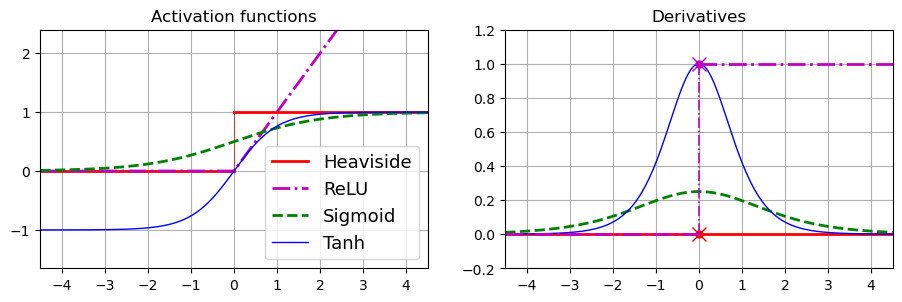

In [30]:
import matplotlib.pyplot as plt

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()

为什么需要激活函数？

如果连接多个线性变换，那么得到的只是一个线性变换。例如，如果 $f(x)=2x+3$ 且 $g(x)=5x-1$，则连接这两个线性函数可以得到另一个线性函数：
$$
f(g(x)) = 2(5x-1)+3 = 10x+1
$$

因此，如果层之间没有非线性，那么即使是很深的层堆叠也等同于单个层，因此你无法解决非常复杂的问题。

相反，具有非线性激活的足够大的 DNN 理论上可以近似任何连续函数。

In [23]:
def sigmoid(zi_bian_liang):
    return 1 / (1+np.exp(-zi_bian_liang))

x = 0.5
y = sigmoid(0.5)

dy_dx = (sigmoid(0.5 + 1e-7) - sigmoid(0.5)) / (1e-7)
print(dy_dx)

print(y * (1-y))

0.23500370871509801
0.2350037122015945


## MLP回归

MLP可用于回归任务。如果要预测单个值（例如，房屋的价格，给定其许多特征），则只需要单个输出神经元：其输出就是预测值。

对于多元回归（即一次预测多个值），每个输出维度需要一个输出神经元。例如，要在图像中定位物体的中心，你需要预测2D坐标，因此需要两个输出神经元。

如果还想在物体周围放置边框，则还需要两个数值：物体的宽度和高度。因此，得到了四个输出神经元。

Scikit-Learn包含一个MLPRegressor类，用它来构建一个具有三个隐藏层的MLP，每个隐藏层由50个神经元组成，并在房屋数据集上对其进行训练。

为简单起见，我们将使用Scikit-Learn的fetch_california_housing()函数来加载数据。这个数据集只包含数值特征（没有ocean_proximity特征），并且没有缺失值。

下面的代码首先获取和拆分数据集，然后创建一个流水线来标准化输入特征，之后再将它们送到MLPRegressor。

标准化神经网络非常重要，因为它们是使用梯度下降训练的，当特征具有非常不同的尺度时，梯度下降不会很好地收敛。

最后，代码训练模型并评估其验证误差。该模型在隐藏层中使用ReLU激活函数，并使用称为Adam的梯度下降变体（后面会讨论）来最小化均方误差，并使用一点点l2正则化（你可以通过超参数alpha进行控制）：

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()  # 可能要换成作业5的数据集
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

rmse

0.5053326657968626

注意，此 MLP 不对输出层使用任何激活函数，因此它可以自由输出它想要的任何值。这通常没问题，但是如果你想保证输出永远是正数，那么你应该在输出层使用 ReLU 激活函数，或者 softplus 激活函数，它是 ReLU 的平滑变体：

$$
\text{softplus}(z) = \log(1 + \exp(z))
$$

当 $z$ 为负时，softplus 接近 0；当 $z$ 为正时，softplus 接近 $z$。

最后，如果你想保证预测总是落在给定的值范围内，那么你应该使用 sigmoid 函数或双曲正切函数，并将目标缩放到适当的范围：

- sigmoid 为 $0 \sim 1$
- tanh 为 $-1 \sim 1$

遗憾的是，`MLPRegressor` 类不支持输出层中的激活函数。

只需几行代码即可使用Scikit-Learn构建和训练标准MLP，但构建出的神经网络功能有限。这就是马上使用Keras实现MLP的原因。

`MLPRegressor` 类使用均方误差，这通常是回归所需的，但如果训练集中有很多异常值，可能更愿意改用平均绝对误差。

或者，可能想要使用 Huber 损失，它是两者的组合。当误差小于阈值 $\delta$（通常为 1）时，它是二次的，但当误差大于 $\delta$ 时，它是线性的。线性部分使其对异常值的敏感度低于均方误差，而二次部分使其收敛速度更快，比平均绝对误差更精确。但是，`MLPRegressor` 只支持 MSE。

下表总结了回归 MLP 的典型架构。

** 典型的回归 MLP 架构**

| 超参数                     | 典型值                                                                 |
|----------------------------|------------------------------------------------------------------------|
| 隐藏层数量                 | 取决于问题，但通常为 1～5                                               |
| 每个隐藏层的神经元数量     | 取决于问题，但通常为 10～100                                            |
| 输出神经元数量             | 每个预测维度输出 1 个神经元                                             |
| 隐藏层激活                 | ReLU                                                                   |
| 输出激活                   | 无，或 ReLU/softplus（如果输出为正）或 sigmoid/tanh（如果输出有界）       |
| 损失函数                   | MSE，或 Huber（如果存在异常值）                                         |


## MLP分类

todo： MLP分类的内容

随堂练习：使用Tensorflow playground（神经网络模拟器）：https://playground.tensorflow.org/， 感受神经网络的相关超参数

a.神经网络学习到的模式。单击“Run”按钮（左上方），尝试训练默认的神经网络。请注意，它如何快速找到一个适合分类任务的最优解。第一隐藏层中的神经元已经学会了简单模式，而第二隐藏层中的神经元已经学会了将第一隐藏层的简单模式组合为更复杂的模式。通常，层数越多，模式越复杂。

b.激活函数。尝试用ReLU激活函数替换tanh激活函数，然后再次训练网络。注意，它很快找到了最优解，但这次边界是线性的。这是由于ReLU函数的形状引起的。

c.局部极小值的风险。修改网络架构，使其只有一个具有3个神经元的隐藏层。对其进行多次训练（要重置网络权重，请单击“Play”按钮旁边的“Reset”按钮）。请注意，训练时间变化很大，有时甚至会停留在局部最小值中。

d.当神经网络太小时会发生的情况。删除一个神经元，只保留两个。请注意，即使你尝试多次，神经网络现在也无法找到一个好的解。该模型的参数太少，系统欠拟合训练集。

e.当神经网络足够大时会发生的情况。将神经元的数量设置为8个，然后对网络进行几次训练。请注意，它现在始终能快速运行，并且不会卡在某一点。这显示了神经网络理论中的一个重要发现：大型神经网络很少会陷入局部极小值，即使陷入了，这些局部最优也几乎与全局最优一样好。但是，它们仍然可能在很长一段时间内停滞不前。

f. 深层网络中梯度消失的风险。选择spiral数据集（“DATA”下的右下数据集），并将网络架构更改为4个隐藏层，每个隐藏层具有8个神经元。请注意，训练花费的时间更长，并且经常长时间停滞不前。还要注意，（右侧）最高层的神经元倾向于比（左侧）最低层的神经元更快地进化。这个问题称为“梯度消失”，可以通过后面要讨论的其他技术来缓解。

g. 尝试其他参数，建立对神经网络的直观了解。